# Module1

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import csv

In [2]:
data_set = pd.read_csv('AAPL_Training.csv',index_col="Date",parse_dates=True)

In [3]:
data_set.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,0.265625,0.272321,0.260045,0.265625,0.228800,452312000
2001-01-03,0.258929,0.297991,0.257813,0.292411,0.251872,817073600
2001-01-04,0.323940,0.330357,0.300223,0.304688,0.262447,739396000
2001-01-05,0.302455,0.310268,0.286830,0.292411,0.251872,412356000
2001-01-08,0.302455,0.303292,0.284598,0.295759,0.254756,373699200


In [51]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5070 entries, 2001-01-02 to 2021-02-26
Data columns (total 6 columns):
Open         5070 non-null float64
High         5070 non-null float64
Low          5070 non-null float64
Close        5070 non-null float64
Adj Close    5070 non-null float64
Volume       5070 non-null int64
dtypes: float64(5), int64(1)
memory usage: 277.3 KB


In [4]:
data_set.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [7]:
# open input CSV file as source
# open output CSV file as result
with open("AAPL_Training.csv", "r") as source:
    reader = csv.reader(source)
        
    with open("AAPL_Training_Extracted.csv", "w") as result:
        writer = csv.writer(result)
        for r in reader:
                
            # Use CSV Index to remove a column from CSV
            #r[3] = r['year']
            writer.writerow((r[0], r[1], r[2], r[3], r[4], r[6]))

In [8]:
dataset = pd.read_csv('AAPL_Training_Extracted.csv',index_col="Date",parse_dates=True)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5070 entries, 2001-01-02 to 2021-02-26
Data columns (total 5 columns):
Open      5070 non-null float64
High      5070 non-null float64
Low       5070 non-null float64
Close     5070 non-null float64
Volume    5070 non-null int64
dtypes: float64(4), int64(1)
memory usage: 237.7 KB


In [52]:
dataset.head()

,Open,High,Low,Close,Volume,Close: 30 Day Mean
Date,,,,,,
2001-01-02,0.265625,0.272321,0.260045,0.265625,452312000.0,NaN
2001-01-03,0.258929,0.297991,0.257813,0.292411,817073600.0,NaN
2001-01-04,0.323940,0.330357,0.300223,0.304688,739396000.0,NaN
2001-01-05,0.302455,0.310268,0.286830,0.292411,412356000.0,NaN
2001-01-08,0.302455,0.303292,0.284598,0.295759,373699200.0,NaN


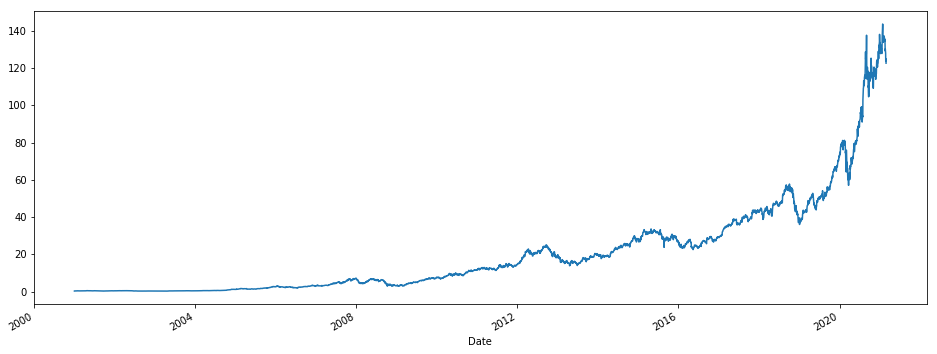

In [10]:
dataset['Open'].plot(figsize=(16,6))

In [12]:
dataset["Volume"] = dataset["Volume"].astype(str).str.replace(',', '').astype(float)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5070 entries, 2001-01-02 to 2021-02-26
Data columns (total 5 columns):
Open      5070 non-null float64
High      5070 non-null float64
Low       5070 non-null float64
Close     5070 non-null float64
Volume    5070 non-null float64
dtypes: float64(5)
memory usage: 237.7 KB


# Module2

In [19]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)


In [20]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [27]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 5070):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Module3

In [28]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout



In [29]:
# Initialising the RNN
regressor = Sequential()



In [30]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))



In [31]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
5010/5010 [==============================] - 40s 8ms/step - loss: 0.0029
Epoch 2/100
5010/5010 [==============================] - 39s 8ms/step - loss: 0.0010
Epoch 3/100
5010/5010 [==============================] - 39s 8ms/step - loss: 8.9118e-04
Epoch 4/100
5010/5010 [==============================] - 39s 8ms/step - loss: 7.5892e-04
Epoch 5/100
5010/5010 [==============================] - 40s 8ms/step - loss: 8.0301e-04
Epoch 6/100
5010/5010 [==============================] - 39s 8ms/step - loss: 7.5924e-04
Epoch 7/100
5010/5010 [==============================] - 39s 8ms/step - loss: 6.4471e-04
Epoch 8/100
5010/5010 [==============================] - 39s 8ms/step - loss: 5.9517e-04
Epoch 9/100
5010/5010 [==============================] - 40s 8ms/step - loss: 5.5615e-04
Epoch 10/100
5010/5010 [==============================] - 39s 8ms/step - loss: 5.2965e-04
Epoch 11/100
5010/5010 [==============================] - 42s 8ms/step - loss: 5.1649e-04
Epoch 12/100
5010/5010 [===

5010/5010 [==============================] - 44s 9ms/step - loss: 3.0992e-04
Epoch 93/100
5010/5010 [==============================] - 44s 9ms/step - loss: 3.8095e-04
Epoch 94/100
5010/5010 [==============================] - 40s 8ms/step - loss: 3.8766e-04
Epoch 95/100
5010/5010 [==============================] - 41s 8ms/step - loss: 3.2066e-04
Epoch 96/100
5010/5010 [==============================] - 40s 8ms/step - loss: 3.1215e-04
Epoch 97/100
5010/5010 [==============================] - 40s 8ms/step - loss: 3.3065e-04
Epoch 98/100
5010/5010 [==============================] - 38s 8ms/step - loss: 3.3353e-04
Epoch 99/100
5010/5010 [==============================] - 41s 8ms/step - loss: 3.2751e-04
Epoch 100/100
5010/5010 [==============================] - 40s 8ms/step - loss: 3.0773e-04


# Module4

In [32]:
# Part 3 - Making the predictions and visualising the results

data_set_test = pd.read_csv('AAPL_test.csv',index_col="Date",parse_dates=True)

In [34]:
data_set_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-01,123.750000,127.930000,122.790001,127.790001,127.790001,115998300
2021-03-02,128.410004,128.720001,125.010002,125.120003,125.120003,102015300
2021-03-03,124.809998,125.709999,121.839996,122.059998,122.059998,112430400
2021-03-04,121.750000,123.599998,118.620003,120.129997,120.129997,177275300
2021-03-05,120.980003,121.940002,117.570000,121.419998,121.419998,153590400


In [35]:
data_set_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2021-03-01 to 2021-03-26
Data columns (total 6 columns):
Open         20 non-null float64
High         20 non-null float64
Low          20 non-null float64
Close        20 non-null float64
Adj Close    20 non-null float64
Volume       20 non-null int64
dtypes: float64(5), int64(1)
memory usage: 1.1 KB


In [36]:
# open input CSV file as source
# open output CSV file as result
with open("AAPL_Test.csv", "r") as source:
    reader = csv.reader(source)
        
    with open("AAPL_Test_Extracted.csv", "w") as result:
        writer = csv.writer(result)
        for r in reader:
                
            # Use CSV Index to remove a column from CSV
            #r[3] = r['year']
            writer.writerow((r[0], r[1], r[2], r[3], r[4], r[6]))


In [38]:
dataset_test = pd.read_csv('AAPL_Test_Extracted.csv',index_col="Date",parse_dates=True)

In [39]:
dataset_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-01,123.750000,127.930000,122.790001,127.790001,115998300
2021-03-02,128.410004,128.720001,125.010002,125.120003,102015300
2021-03-03,124.809998,125.709999,121.839996,122.059998,112430400
2021-03-04,121.750000,123.599998,118.620003,120.129997,177275300
2021-03-05,120.980003,121.940002,117.570000,121.419998,153590400


In [40]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [41]:
dataset_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-01,123.750000,127.930000,122.790001,127.790001,115998300
2021-03-02,128.410004,128.720001,125.010002,125.120003,102015300
2021-03-03,124.809998,125.709999,121.839996,122.059998,112430400
2021-03-04,121.750000,123.599998,118.620003,120.129997,177275300
2021-03-05,120.980003,121.940002,117.570000,121.419998,153590400


In [43]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2021-03-01 to 2021-03-26
Data columns (total 5 columns):
Open      20 non-null float64
High      20 non-null float64
Low       20 non-null float64
Close     20 non-null float64
Volume    20 non-null int64
dtypes: float64(4), int64(1)
memory usage: 960.0 bytes


In [44]:
dataset_test["Volume"] = dataset_test["Volume"].astype(str).str.replace(',', '').astype(float)

In [45]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [46]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2021-03-01 to 2021-03-26
Data columns (total 1 columns):
Open    20 non-null float64
dtypes: float64(1)
memory usage: 320.0 bytes


In [55]:
test_set

,Open
Date,
2021-03-01,123.750000
2021-03-02,128.410004
2021-03-03,124.809998
2021-03-04,121.750000
2021-03-05,120.980003
2021-03-08,120.930000
2021-03-09,119.029999
2021-03-10,121.690002
2021-03-11,122.540001


In [47]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [48]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
0    20 non-null float32
dtypes: float32(1)
memory usage: 160.0 bytes


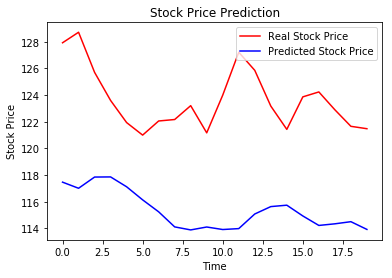

In [54]:

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
